In [1]:
import pandas as pd
import requests
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
from datetime import datetime
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
archive_df = pd.read_csv("twitter-archive-enhanced.csv")
image_df= pd.read_csv('image-predictions.tsv', sep='\t')



In [19]:
# Downloading and saving the image prediction data using Requests
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
# Get the response object of the requests library as you have learned in previous lessons:
response = requests.get(url)

# GET the file name programmatically
file_name = url.split('/')[-1]



In [ ]:
# Write the file with the context manager with:
with open(file_name, 'wb') as file:
     file.write(response.content)

In [3]:
list_df = []

with open('tweet-json.txt', 'r') as file:
     for line in file:
        tweet = json.loads(line)
        tweet_id = tweet["id"]
        retweet_count= tweet["retweet_count"]
        fav_count= tweet["favorite_count"]
        user_count = tweet['user']['followers_count']

        list_df.append({"tweet_id": tweet_id,"retweet_count": retweet_count,"favourites_count":fav_count,"user_count":user_count})

    
    

In [4]:
api_df = pd.DataFrame(list_df, columns = ['tweet_id', 'retweet_count',"favourites_count","user_count"])



In [108]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [5]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1951,673686845050527744,NaN,NaN,2015-12-07 02:13:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He's upset that the 4th of Jul...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673686845...,11,10,George,None,None,None,None
1084,738402415918125056,NaN,NaN,2016-06-02 16:10:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Don't talk to me or my son ever again"" ...10/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738402415...,10,10,None,None,None,None,None
717,783695101801398276,NaN,NaN,2016-10-05 15:47:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loomis. He's the leader of the Kenneth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783695101...,12,10,Loomis,None,None,None,None
1353,703769065844768768,NaN,NaN,2016-02-28 02:29:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're trying to watch your favorite tv s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703769065...,10,10,None,None,None,None,None
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None


In [10]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [52]:
archive_df.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
an             7
Toby           7
Bailey         7
Buddy          7
Daisy          7
Rusty          6
Scout          6
Jax            6
Bella          6
Milo           6
Leo            6
Dave           6
Stanley        6
Koda           6
Oscar          6
Jack           6
George         5
            ... 
Clarkus        1
Rupert         1
Bones          1
Jessifer       1
Emma           1
Daniel         1
Buckley        1
Rinna          1
Cupid          1
Augie          1
Odin           1
Danny          1
Divine         1
Kara           1
Cheryl         1
Kathmandu      1
Cora           1
Julius         1
Cermet         1
Vixen          1
Jett           1
Mason          1
Farfle         1
Bilbo          1
Linus          1
Brooks         1
Pete           1
Bobbay        

# Key Points
Key points to keep in mind when data wrangling for this project:

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

Cleaning includes merging individual pieces of data according to the rules of tidy data.


-i should remove retweet cloumns and this rows
- remove tweets that haven't images

# Assess: 
# quality Issue: 
 
- remove notnull in retweeted_status_id / in_reply_to_status_id

- (remove columns from archive_df: in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)
- fix the “None” string issue in the those entries by replacing it with empty string ""


- convert timestamp to datetime


- classfication of dog to be readable by seprate it with "-"
- "" values with Nan in dog_breed
- filter archive_df_clean
- filter api_df_clean
- filter image_df_clean
- in archive_df_clean , image_df_clean , api_df_clean reset index
-   type float and also it should be correctly extracted (rating_numerator) in archive_df_clean
-  extract source in archive_df_clean

# Tidiness Issue:
- classfication of dog: doggo,floofer,pupper,puppo in one column(Column headers are values, not variable names.)
-  tidiness issue Column headers are values, not variable names prediction_1 ,confidence_1,breed_1	prediction_2,	confidence_2,	breed_2	prediction_3,	confidence_3,	breed_3

- archive_df_clean, api_df_clean in one table to solve tidiness issue A single observational unit is stored in multiple tables.


tidiness issue: classfication of dog: doggo,floofer,pupper,puppo 

        

In [6]:
archive_df_clean = archive_df.copy()

In [7]:
api_df_clean = api_df.copy()

In [8]:
image_df_clean = image_df.copy()

# Clean

# Define

Using drop to remove notnull value from retweeted_status_id , in_reply_to_status_id


# Code


In [9]:
archive_df_clean.drop(archive_df_clean[archive_df_clean['retweeted_status_id'] .notnull()].index, inplace = True) 



In [10]:
archive_df_clean.drop(archive_df_clean[archive_df_clean['in_reply_to_status_id'] .notnull()].index, inplace = True) 



In [11]:
archive_df_clean = archive_df_clean.reset_index(drop=True)



# Test

In [15]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

# Define:
using Drop to remove :
in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)

# Code:

In [12]:
archive_df_clean = archive_df_clean.drop(["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"], axis = 1)

# Test:

In [17]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


# Define:

Useing to_datetime converted into Date Time object from a string object.

# Code:

In [13]:
archive_df_clean["timestamp"] = pd.to_datetime(archive_df_clean["timestamp"]) 

# Test:

In [19]:
archive_df_clean["timestamp"].sample()

1958   2015-12-06 19:13:01
Name: timestamp, dtype: datetime64[ns]

In [20]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


In [22]:
archive_df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
514,789314372632018944,2016-10-21 03:56:25,"<a href=""http://twitter.com/download/iphone"" r...",HE WAS JUST A LIL SLEEPY FROM BEING SUCH A GOO...,https://twitter.com/sebscat/status/78881832853...,13,10,None,None,None,None,None
1602,675853064436391936,2015-12-13 01:41:41,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
794,747844099428986880,2016-06-28 17:28:22,"<a href=""http://twitter.com/download/iphone"" r...",This is Huxley. He's pumped for #BarkWeek. Eve...,https://twitter.com/dog_rates/status/747844099...,11,10,Huxley,None,None,None,None
907,730427201120833536,2016-05-11 15:59:50,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's flawless. Really wants ...,https://twitter.com/dog_rates/status/730427201...,11,10,Crystal,None,None,None,None
1964,668484198282485761,2015-11-22 17:40:27,"<a href=""http://twitter.com/download/iphone"" r...",Good teamwork between these dogs. One is on lo...,https://twitter.com/dog_rates/status/668484198...,9,10,None,None,None,None,None


In [21]:
(archive_df_clean.loc[:, 'doggo':"puppo"] != 'None').sum()


doggo       83
floofer     10
pupper     230
puppo       24
dtype: int64

In [24]:
nonunique_stage = archive_df_clean[(archive_df_clean['doggo'] != 'None') & (archive_df_clean['pupper'] != 'None')]


In [25]:
nonunique_stage.iloc[:, -4:].head()


,doggo,floofer,pupper,puppo
358,doggo,None,pupper,None
416,doggo,None,pupper,None
446,doggo,None,pupper,None
536,doggo,None,pupper,None
562,doggo,None,pupper,None


# Define

Using replace func to fix the “None” string issue in the those entries by replacing it with empty string "". 

# Code

In [14]:
archive_df_clean = archive_df_clean.replace(to_replace ="None", 
                 value ="") 


# Test

In [23]:
archive_df_clean.sample(10)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1336,705223444686888960,2016-03-03 02:49:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Bode. He's a heavy sleeper. 9/10 https...,https://twitter.com/dog_rates/status/705223444...,9,10,Bode,,,,
531,808106460588765185,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,,doggo,,pupper,
122,869227993411051520,2017-05-29 16:24:37,"<a href=""http://twitter.com/download/iphone"" r...",This is Gizmo. His favorite thing is standing ...,https://twitter.com/dog_rates/status/869227993...,13,10,Gizmo,,,,
1437,697242256848379904,2016-02-10 02:14:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has a massive tumor growing...,https://twitter.com/dog_rates/status/697242256...,10,10,Oakley,,,,
50,882627270321602560,2017-07-05 15:48:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has his first swim lesson ...,https://twitter.com/dog_rates/status/882627270...,13,10,Stanley,,,,
1818,676593408224403456,2015-12-15 02:43:33,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,https://vine.co/v/eEQQaPFbgOY,11,10,,,,pupper,
1719,680161097740095489,2015-12-24 23:00:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Goliath. He's an example of irony. Head i...,https://twitter.com/dog_rates/status/680161097...,12,10,Goliath,,,,
1373,701981390485725185,2016-02-23 04:06:20,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiji. She's a Powdered Stegafloof. Ver...,https://twitter.com/dog_rates/status/701981390...,12,10,Fiji,,,,
1655,683391852557561860,2016-01-02 20:58:09,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Jack (pronounced ""Kevin""). He's a...",https://twitter.com/dog_rates/status/683391852...,11,10,Jack,,,,
2228,668256321989451776,2015-11-22 02:34:57,"<a href=""http://twitter.com/download/iphone"" r...",This is Jareld. Jareld rules these waters. Lad...,https://twitter.com/dog_rates/status/668256321...,13,10,Jareld,,,,


In [28]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 196.7+ KB


# Define

Using add + Make new column dog_breed to store classfication of dog: doggo,floofer,pupper,puppo  

# Code

In [15]:
archive_df_clean["dog_breed"] = archive_df_clean["doggo"] + archive_df_clean["floofer"] + archive_df_clean["pupper"] + archive_df_clean["puppo"]

In [16]:
archive_df_clean["dog_breed"].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_breed, dtype: int64

In [17]:
archive_df_clean = archive_df_clean.drop(["doggo","floofer","pupper","puppo"], axis = 1)

# Test

In [18]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_breed             2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 147.5+ KB


# Define

Using loc to rename classfication of dog to be readable by seprate it with "-"

# Code

In [19]:
archive_df_clean.loc[archive_df_clean.dog_breed == 'doggopupper', 'dog_breed'] = 'doggo-pupper'


In [20]:
archive_df_clean.loc[archive_df_clean.dog_breed == 'doggofloofer', 'dog_breed'] = 'doggo-floofer'



In [21]:
archive_df_clean.loc[archive_df_clean.dog_breed == 'doggopuppo', 'dog_breed'] = 'doggo-puppo'



# Test

In [26]:
archive_df_clean.dog_breed.value_counts()

                 1761
pupper            221
doggo              72
puppo              23
doggo-pupper        9
floofer             9
doggo-puppo         1
doggo-floofer       1
Name: dog_breed, dtype: int64

# Define

Using replace to replace "" values with Nan in dog_breed

# code

In [22]:
archive_df_clean.dog_breed = archive_df_clean.dog_breed.replace("", np.NaN, regex=True)


# Test

In [33]:
archive_df_clean.dog_breed.sample(5)

970        NaN
1529       NaN
408        NaN
82      pupper
75         NaN
Name: dog_breed, dtype: object

In [35]:
image_df_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
371,672980819271634944,https://pbs.twimg.com/media/CVbodBOUsAAb7jZ.jpg,1,car_mirror,0.232754,False,basset,0.219461,True,beagle,0.112397,True
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,Italian_greyhound,0.618316,True,Weimaraner,0.151363,True,vizsla,0.085989,True
914,700890391244103680,https://pbs.twimg.com/media/CboQFolWIAE04qE.jpg,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True
712,685321586178670592,https://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg,1,Boston_bull,0.972483,True,French_bulldog,0.025469,True,boxer,0.000458,True
298,671485057807351808,https://pbs.twimg.com/media/CVGYGNYXAAAQ9m-.jpg,1,Samoyed,0.627901,True,Great_Pyrenees,0.276421,True,kuvasz,0.057874,True
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden_retriever,0.790371,True,cocker_spaniel,0.130268,True,Labrador_retriever,0.064629,True
996,708349470027751425,https://pbs.twimg.com/media/CdSQFWOWAAApgfq.jpg,1,muzzle,0.243890,False,basenji,0.187158,True,Boston_bull,0.092727,True
306,671528761649688577,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,1,Doberman,0.782626,True,black-and-tan_coonhound,0.109678,True,Gordon_setter,0.052110,True
1060,715009755312439296,https://pbs.twimg.com/media/Cew5kyOWsAA8Y_o.jpg,1,dingo,0.310903,False,Chihuahua,0.142288,True,Cardigan,0.103945,True
1579,796177847564038144,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,0.087355,False


In [51]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [52]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id            2354 non-null int64
retweet_count       2354 non-null int64
favourites_count    2354 non-null int64
user_count          2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [72]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 9 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_breed             303 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 138.7+ KB


# Define

Using list,unique to filter archive_df_clean with image tweets

# Code

In [23]:
# creating a list of tweet_ids with images "tweets_with_image" and confirming its length
tweets_with_image = list(image_df_clean.tweet_id.unique())


In [24]:
# Cleaning in action ;)
archive_df_clean = archive_df_clean[archive_df_clean.tweet_id.isin(tweets_with_image)]

# Test

In [38]:
archive_df_clean.tweet_id.count()

1971

# Define

Using list,unique to filter image_df_clean That is not in reply and retweet

# Code

In [25]:
tweets_with_image = list(archive_df_clean.tweet_id.unique())



In [26]:
image_df_clean = image_df_clean[image_df_clean.tweet_id.isin(tweets_with_image)]

# Test

In [54]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null int64
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_level    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
breed               5913 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 283.0+ KB


# Define

Using list,unique to filter according to image_df_clean that's we had filter it

# Code

In [27]:
tweets_with_image = list(image_df_clean.tweet_id.unique())


In [28]:
api_df_clean = api_df_clean[api_df_clean.tweet_id.isin(tweets_with_image)]

# Test

In [97]:
image_df_clean.shape

(5913, 7)

# Define

using reset_index in archive_df_clean , image_df_clean , api_df_clean to reset index

# Code

In [29]:
archive_df_clean = archive_df_clean.reset_index(drop=True)


In [30]:
image_df_clean = image_df_clean.reset_index(drop=True)



In [31]:
api_df_clean = api_df_clean.reset_index(drop=True)

# Test

In [32]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 4 columns):
tweet_id            1971 non-null int64
retweet_count       1971 non-null int64
favourites_count    1971 non-null int64
user_count          1971 non-null int64
dtypes: int64(4)
memory usage: 61.7 KB


In [95]:
image_df_clean.head(10)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


# Define

Using wide_to_long to solve tidiness issue Column headers are values, not variable names.


# Code

In [33]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']

In [34]:
image_df_clean.columns = cols


In [35]:
image_df_clean = pd.wide_to_long(image_df_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

# Test

In [60]:
image_df_clean.head(15)

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
6,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German_shepherd,0.596461,True
7,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,2,malinois,0.138584,True
8,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,3,bloodhound,0.116197,True
9,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,1,Rhodesian_ridgeback,0.408143,True


In [56]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 4 columns):
tweet_id            1971 non-null int64
retweet_count       1971 non-null int64
favourites_count    1971 non-null int64
user_count          1971 non-null int64
dtypes: int64(4)
memory usage: 61.7 KB


In [76]:
archive_df_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,rating_numerator2
224,836677758902222849,2017-02-28 20:41:37,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,https://twitter.com/dog_rates/status/836677758...,11.0,10,Oliver,NaN,11.0
1452,676776431406465024,2015-12-15 14:50:49,"<a href=""http://twitter.com/download/iphone"" r...","When someone yells ""cops!"" at a party and you ...",https://twitter.com/dog_rates/status/676776431...,10.0,10,,NaN,10.0
156,852912242202992640,2017-04-14 15:51:39,"<a href=""http://twitter.com/download/iphone"" r...",Meet Benny. He likes being adorable and making...,"https://www.gofundme.com/bennys-medical-bills,...",12.0,10,Benny,NaN,12.0
1705,670811965569282048,2015-11-29 03:50:10,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She enjoys her stick in the yard....,https://twitter.com/dog_rates/status/670811965...,10.0,10,Maggie,NaN,10.0
652,759099523532779520,2016-07-29 18:53:24,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He has a drinking problem. Inflatab...,https://twitter.com/dog_rates/status/759099523...,7.0,10,Toby,NaN,7.0
53,880465832366813184,2017-06-29 16:39:47,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,https://twitter.com/dog_rates/status/880465832...,12.0,10,Bella,NaN,12.0
1539,674394782723014656,2015-12-09 01:07:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He's a hide and seek champion. S...,https://twitter.com/dog_rates/status/674394782...,8.0,10,Gary,NaN,8.0
1652,671866342182637568,2015-12-02 01:39:53,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dylan. He can use a fork but clearly can'...,https://twitter.com/dog_rates/status/671866342...,10.0,10,Dylan,NaN,10.0
1933,666454714377183233,2015-11-17 03:16:00,"<a href=""http://twitter.com/download/iphone"" r...",I'll name the dogs from now on. This is Kreggo...,https://twitter.com/dog_rates/status/666454714...,10.0,10,Kreggory,NaN,10.0
1278,684926975086034944,2016-01-07 02:38:10,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bruiser &amp; Charlie. They are the best ...,https://twitter.com/dog_rates/status/684926975...,11.0,10,Bruiser,NaN,11.0


In [102]:
archive_df_clean['rating_numerator'].describe()

count    1971.000000
mean       12.178985
std        41.607230
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [103]:
archive_df_clean['rating_numerator'].value_counts()

12.00      446
10.00      417
11.00      392
13.00      253
9.00       150
8.00        95
7.00        52
14.00       33
6.00        32
5.00        32
3.00        19
4.00        16
2.00         9
1.00         5
60.00        1
24.00        1
99.00        1
1776.00      1
13.50        1
11.27        1
165.00       1
11.26        1
0.00         1
84.00        1
9.75         1
45.00        1
88.00        1
144.00       1
44.00        1
121.00       1
204.00       1
50.00        1
80.00        1
420.00       1
Name: rating_numerator, dtype: int64

# Define

Using extract and float to be type float and also it should be correctly extracted rating_numerator

# Code

In [36]:
num_p = re.compile('(\d+\.?\d?\d?)\/(\d{1,3})')
archive_df_clean['rating_numerator'] = archive_df_clean.text.str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')

# Test

In [80]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 9 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_breed             303 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 138.7+ KB


In [85]:
archive_df_clean.source.sample(10)

1401    <a href="http://twitter.com/download/iphone" r...
1211    <a href="http://twitter.com/download/iphone" r...
1094    <a href="http://twitter.com/download/iphone" r...
1238    <a href="http://twitter.com/download/iphone" r...
1824    <a href="http://twitter.com/download/iphone" r...
246     <a href="http://twitter.com/download/iphone" r...
1563    <a href="http://twitter.com/download/iphone" r...
1060    <a href="http://twitter.com/download/iphone" r...
559     <a href="http://twitter.com/download/iphone" r...
895     <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [104]:
archive_df_clean['rating_numerator'].describe()

count    1971.000000
mean       12.178985
std        41.607230
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

# Define

Use extract and regex to extract source 

# Code

In [37]:
archive_df_clean['source'] = archive_df_clean['source'].str.extract('^<a.+>(.+)</a>$')


# Test

In [92]:
archive_df_clean['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

# Define

Using merge to joining archive_df_clean, api_df_clean in one table to solve tidiness issue A single observational unit is stored in multiple tables.

# Code

In [38]:
df_merged = pd.merge(left = archive_df_clean,right = api_df_clean,how = "inner",on = "tweet_id")

In [40]:
df_mergedd = pd.merge(left = df_merged,right = image_df_clean,how = "inner",on = "tweet_id")

# Test

In [42]:
df_mergedd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5913 entries, 0 to 5912
Data columns (total 18 columns):
tweet_id              5913 non-null int64
timestamp             5913 non-null datetime64[ns]
source                5913 non-null object
text                  5913 non-null object
expanded_urls         5913 non-null object
rating_numerator      5913 non-null float64
rating_denominator    5913 non-null int64
name                  5913 non-null object
dog_breed             909 non-null object
retweet_count         5913 non-null int64
favourites_count      5913 non-null int64
user_count            5913 non-null int64
jpg_url               5913 non-null object
img_num               5913 non-null int64
prediction_level      5913 non-null int64
prediction            5913 non-null object
confidence            5913 non-null float64
breed                 5913 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(7), object(7)
memory usage: 837.3+ KB


In [44]:
df_mergedd.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favourites_count,user_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
1,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2,bagel,0.085851,False
2,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,3,banana,0.076110,False
3,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514,33819,3200889,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
4,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514,33819,3200889,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True
5,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514,33819,3200889,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,3,papillon,0.068957,True
6,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328,25461,3200889,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True
7,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328,25461,3200889,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2,malamute,0.078253,True
8,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328,25461,3200889,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,3,kelpie,0.031379,True
9,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964,42908,3200889,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1,paper_towel,0.170278,False


# Store

In [45]:
df_mergedd.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


In [46]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [47]:
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_breed,retweet_count,favourites_count,user_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
3630,689557536375177216,2016-01-19 21:18:22,Twitter for iPhone,Downright majestic af 12/10 https://t.co/WFh2F...,https://twitter.com/dog_rates/status/689557536...,12.0,10,NaN,NaN,519,2257,3200951,https://pbs.twimg.com/media/CZHM60BWIAA4AY4.jpg,1,1,Eskimo_dog,0.169482,True
433,856543823941562368,2017-04-24 16:22:16,Twitter for iPhone,This is Callie. She'll be your navigator today...,https://twitter.com/dog_rates/status/856543823...,12.0,10,Callie,NaN,3131,17135,3200891,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,1,2,Siamese_cat,0.191218,False
259,872122724285648897,2017-06-06 16:07:15,Twitter for iPhone,This is Kody. He's a baller. Wishes he was a l...,https://twitter.com/dog_rates/status/872122724...,12.0,10,Kody,NaN,8549,35324,3200891,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,1,2,pug,0.066736,True
652,837820167694528512,2017-03-04 00:21:08,Twitter for iPhone,"Here's a pupper before and after being asked ""...",https://twitter.com/dog_rates/status/837820167...,12.0,10,NaN,pupper,8952,37277,3200891,https://pbs.twimg.com/media/C6CI_jbVAAA3-a1.jpg,1,2,Labrador_retriever,0.068718,True
64,887517139158093824,2017-07-19 03:39:09,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10,such,NaN,12082,46959,3200890,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,2,tow_truck,0.029175,False


Getting to know more about the breed of humans best friends, i will first get a glimpse on the frequency distribution of dog breeds:



In [47]:
avg_retweet_count_dog_breed = twitter_archive_master.groupby('dog_breed').retweet_count.mean()

# the index with stand for the x axis in plotting 
avg_retweet_count_dog_breed.index

avg_favourites_count_dog_breed = twitter_archive_master.groupby('dog_breed').favourites_count.mean()



In [109]:
avg_retweet_count_dog_breed

dog_breed
doggo             7125.698413
doggo-floofer     3433.000000
doggo-pupper      4397.250000
doggo-puppo      19196.000000
floofer           4968.714286
pupper            2382.502488
puppo             6473.954545
Name: retweet_count, dtype: float64

In [110]:
avg_favourites_count_dog_breed

dog_breed
doggo            19356.380952
doggo-floofer    17169.000000
doggo-pupper     13219.875000
doggo-puppo      47844.000000
floofer          13206.000000
pupper            7250.527363
puppo            21582.090909
Name: favourites_count, dtype: float64

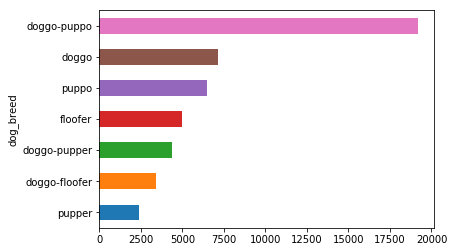

In [114]:
breed_avg_retweet = twitter_archive_master.groupby(['dog_breed']).retweet_count.mean().sort_values(ascending=False)[12::-1]
# plotting
breed_avg_retweet.plot(kind='barh');

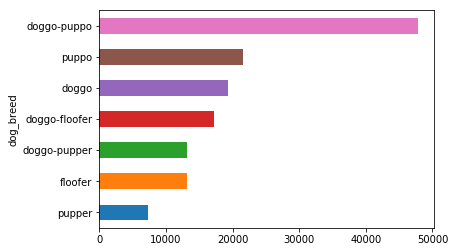

In [153]:
breed_avg_favourites = twitter_archive_master.groupby(['dog_breed']).favourites_count.mean().sort_values(ascending=False)[12::-1]
# plotting
breed_avg_favourites.plot(kind='barh');

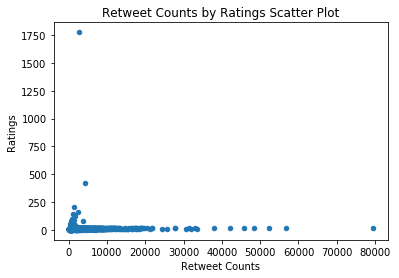

In [162]:
twitter_archive_master.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

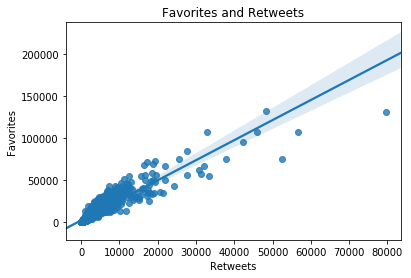

In [170]:
v = sns.regplot(x=twitter_archive_master.retweet_count, y=twitter_archive_master.favourites_count)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = v.get_figure()


In [58]:
twitter_archive_master["source"].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

There are strong positive relationship between retweet and favourites

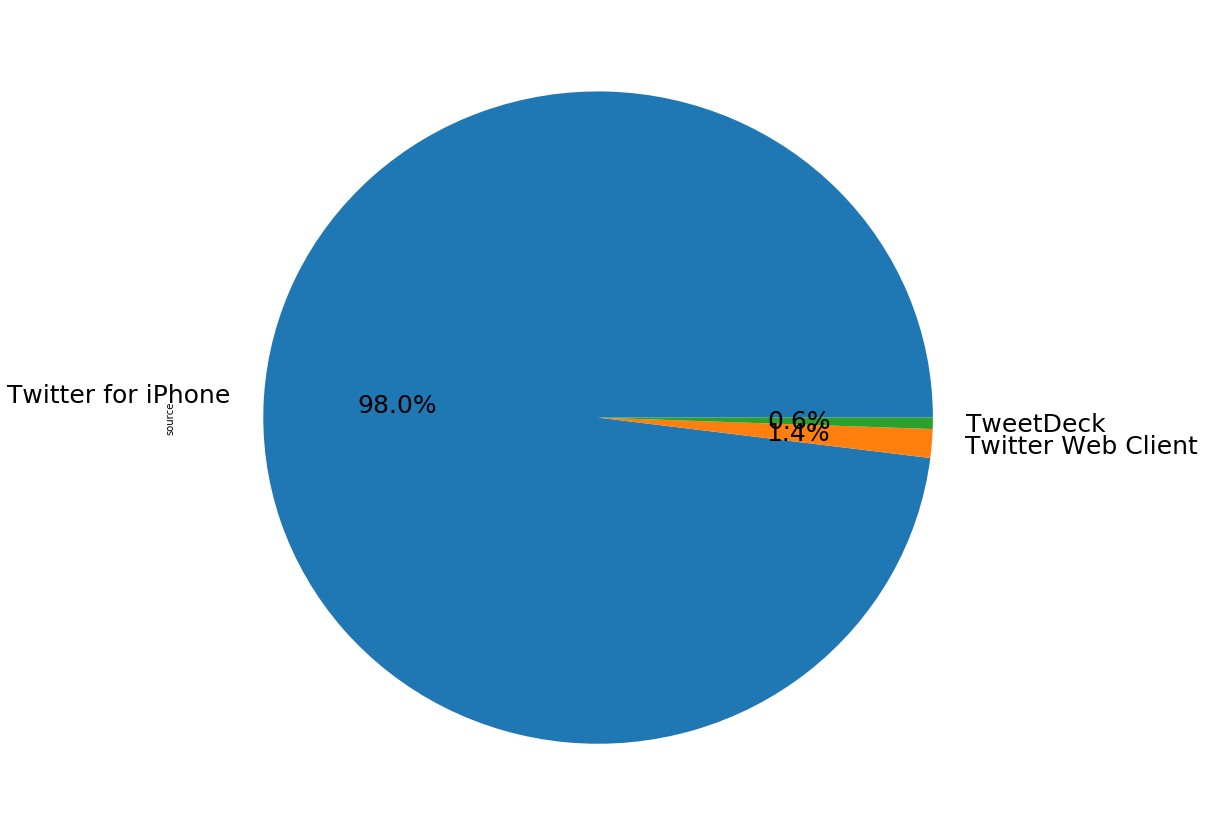

In [57]:
twitter_archive_master['source'].value_counts().iloc[0:3].plot(kind='pie',figsize=(15, 15),fontsize=25,autopct='%1.1f%%');


Labrador_retriever and golden_retriever are the most common dogs in this dataset.

In [141]:
image_df_clean.prediction.value_counts()

Labrador_retriever                265
golden_retriever                  264
Chihuahua                         178
Pembroke                          138
Cardigan                          112
Pomeranian                        103
toy_poodle                        102
pug                                92
chow                               91
French_bulldog                     90
cocker_spaniel                     88
Chesapeake_Bay_retriever           87
Eskimo_dog                         81
beagle                             73
Siberian_husky                     72
kuvasz                             70
malamute                           66
Staffordshire_bullterrier          66
Samoyed                            64
Pekinese                           62
kelpie                             59
American_Staffordshire_terrier     56
miniature_pinscher                 55
Great_Pyrenees                     53
miniature_poodle                   52
collie                             49
German_sheph